In [7]:
import sys, ast, pandas as pd, numpy as np, matplotlib.pyplot as plt
from math import sqrt , exp
generic = lambda x: ast.literal_eval(x)
%matplotlib inline
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt

# load data
take Massimo configuations and add some variables, that are generated using 

python mac/calc_massi_configurations.py --option=read -evf=0.001 -p1 -v3

In [2]:
configurations = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k.csv')

In [4]:
pp_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_pp.csv')
pn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_pn.csv')
nn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_nn.csv')
NN_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_NN_all.csv')

In [20]:
R = np.linspace(0,14,100)
R_0_p , a_p , Np = 6.68  , 0.447 , 82
R_0_n , a_n , Nn = 6.7 , 0.55 , 126
rho_0 = 0.16 
rho_WS_p = [rho_0*(float(Np)/(Np+Nn))/(1+exp((R[i]-R_0_p)/a_p)) for i in range(len(R))]
rho_WS_n = [rho_0*(float(Nn)/(Np+Nn))/(1+exp((R[i]-R_0_n)/a_n)) for i in range(len(R))]
rho_WS_all = [rho_WS_p[i] + rho_WS_n[i] for i in range(len(R))]

# single - body
lets look on the single-body density as a function of the distance from the center of the nucleus

normalization: 17056.0


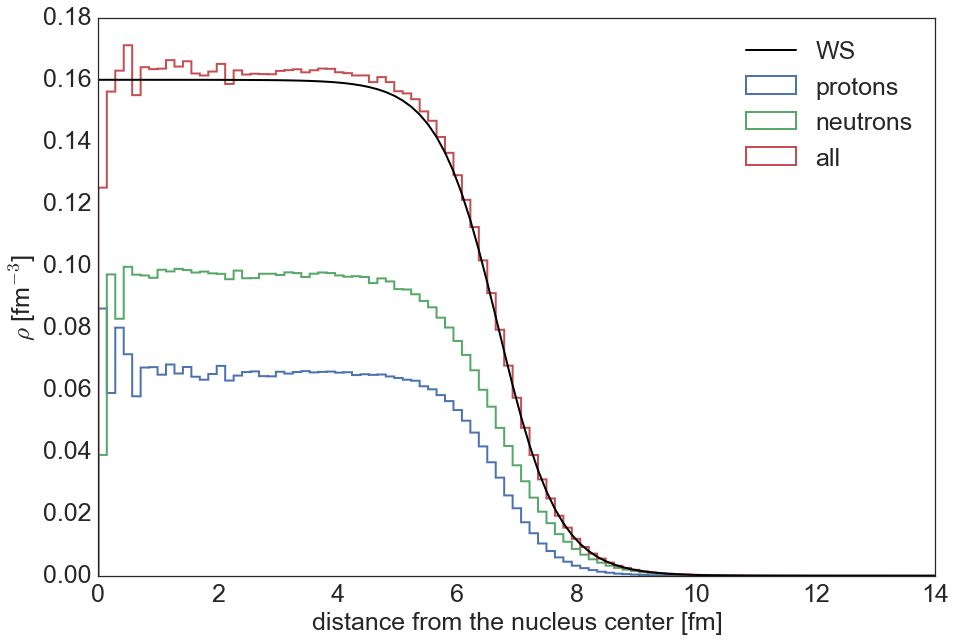

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
neutrons , protons = configurations[configurations['type']=='proton'] , configurations[configurations['type']=='neutron']
N = len(configurations)/float(len(configurations.groupby('nucleus_counter')))*82
print 'normalization:',N
bins = np.linspace(0,14,100)
plt.hist(neutrons.R , weights=1./(N*neutrons.R*neutrons.R) , bins=bins, histtype='step' , label='protons',linewidth=2);
plt.hist(protons.R , weights=1./(N*protons.R*protons.R) , bins=bins, histtype='step', label='neutrons',linewidth=2);
plt.hist(configurations.R , weights=1./(N*configurations.R*configurations.R) , bins=bins, histtype='step', label='all',linewidth=2);
plt.plot(R , rho_WS_all , label='WS', color='black',linewidth=2);
pt.set_axes(ax,'distance from the nucleus center [fm]','$\\rho$ [fm$^{-3}$]')
plt.legend(fontsize=25)

# two - body
collect all nucleons from each nucleus and calculate the inter-nucleon distances

normalization: 17056.0


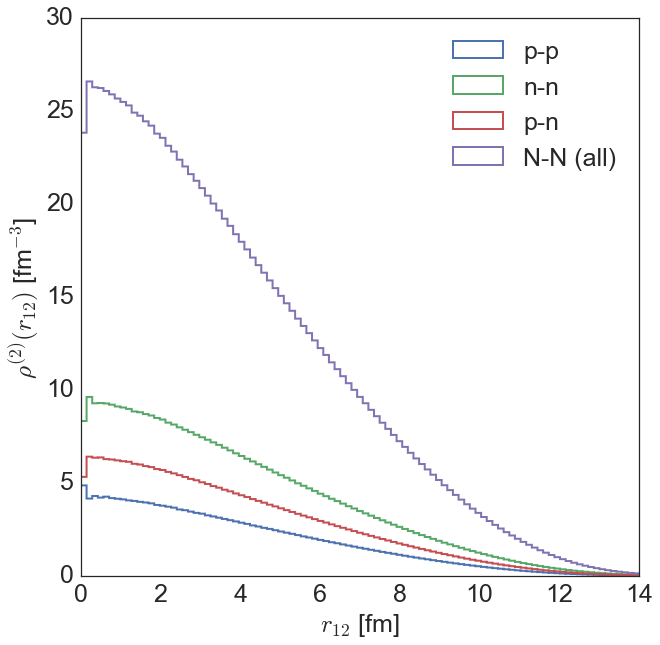

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
N = len(configurations)/float(len(configurations.groupby('nucleus_counter')))*82
print 'normalization:',N
bins = np.linspace(0,14,100)
plt.hist(pp_distances['r(pp)'] , weights=1./(N*pp_distances['r(pp)']*pp_distances['r(pp)']) , bins=bins, histtype='step' , label='p-p',linewidth=2);
plt.hist(nn_distances['r(nn)'] , weights=1./(N*nn_distances['r(nn)']*nn_distances['r(nn)']) , bins=bins, histtype='step' , label='n-n',linewidth=2);
plt.hist(pn_distances['r(pn)'] , weights=1./(N*pn_distances['r(pn)']*pn_distances['r(pn)']) , bins=bins, histtype='step' , label='p-n',linewidth=2);
plt.hist(NN_distances['r(NN)'] , weights=1./(N*NN_distances['r(NN)']*NN_distances['r(NN)']) , bins=bins, histtype='step' , label='N-N (all)',linewidth=2);

pt.set_axes(ax,'$r_{12}$ [fm]','$\\rho^{(2)} (r_{12})$ [fm$^{-3}$]')
plt.legend(fontsize=25)